# PyCaret
- PyCaret is a high-level, low-code Python library that makes it easy to compare, train, evaluate, tune, and deploy machine learning models with only a few lines of code. At its core, PyCaret is basically just a large wrapper over many data science libraries such as Scikit-learn, Yellowbrick, SHAP, Optuna, and Spacy. Yes, you could use these libraries for the same tasks, but if you don’t want to write a lot of code, PyCaret could save you a lot of time.

* [GitHub](https://github.com/pycaret/pycaret)
* [PyCaret for lazy data scientists](https://towardsdatascience.com/how-to-use-pycaret-the-library-for-lazy-data-scientists-91343f960bd2)
* [Modeling in Seconds](https://towardsdatascience.com/modeling-in-seconds-using-pycaret-as-a-tool-for-data-science-fast-decision-making-17c2c5642e17?source=rss----7f60cf5620c9---4)
* [PyCaret 2.1 Features](https://www.kdnuggets.com/2020/09/pycaret-21-new.html)
* [Example: Youtube](https://pycaret.org/)
* [Time Series Forecasting](https://www.kdnuggets.com/2021/04/time-series-forecasting-pycaret-regression-module.html)
* [Anomaly Detection](https://towardsdatascience.com/a-simplified-approach-using-pycaret-for-anomaly-detection-7d33aca3f066?source=rss----7f60cf5620c9---4)



## Exercise #1: PyCaret for lazy data scientists

- Using the Cal Housing dataset.
- The data contains mostly numerical features with one categorical feature for the proximity of each house to the ocean. The target column that we are trying to predict is `median_house_value`. The dataset contains 20,640 observations.

In [1]:
import numpy as np; import pandas as pd; import pycaret

In [3]:
housing_data = pd.read_csv('housing.csv')
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Initialize experiment
- PyCaret experiments preprocess the data and enable logging for all of the models to be used for training.

In [6]:
from pycaret.regression import *
reg_experiment = setup(housing_data, 
                       target = 'median_house_value', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')

,Description,Value
0,session_id,123
1,Target,median_house_value
2,Original Data,"(20640, 10)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14447, 13)"


## Compare Baseline Models
- Finds the model that achieves the **best K-fold cross-validation performance** with `compare_models`. Exclude XGBoost for demonstration purposes.

In [7]:
best_model = compare_models(exclude=['xgboost'], fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,31000.5953,2200017181.9057,46885.7986,0.8349,0.2311,0.1723,2.8680
lightgbm,Light Gradient Boosting Machine,32451.3493,2362163127.6538,48582.4247,0.8228,0.2381,0.1807,0.0540
rf,Random Forest Regressor,33072.4135,2566864379.1811,50654.4931,0.8074,0.2443,0.1841,1.0280
et,Extra Trees Regressor,35715.2657,2858839641.0988,53460.6235,0.7855,0.2549,0.1982,0.4720
gbr,Gradient Boosting Regressor,39002.0759,3147927887.3150,56090.0139,0.7639,0.2736,0.2185,0.4700
lr,Linear Regression,50194.1336,4765772185.6000,69026.1828,0.6426,0.3905,0.2888,0.3080
lasso,Lasso Regression,50194.6117,4765787340.8000,69026.2953,0.6426,0.3906,0.2888,0.2420
ridge,Ridge Regression,50196.5266,4766065254.4000,69028.3469,0.6426,0.3905,0.2888,0.1720
lar,Least Angle Regression,50194.1763,4765780025.5281,69026.2395,0.6426,0.3907,0.2888,0.0080
llar,Lasso Least Angle Regression,50179.0738,4766693170.6670,69032.5860,0.6425,0.3801,0.2881,0.0080


## Train a Model
- We can also train a model with a single line of code. The create_model function simply requires a string corresponding to the type of model that you want to train. You can find a complete list of acceptable strings and the corresponding regression models on the PyCaret documentation page.

In [8]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29879.4353,1932405073.6177,43959.1296,0.8661,0.2151,0.1624
1,30345.5989,1999661259.9516,44717.5722,0.8514,0.2162,0.1624
2,31201.0130,2262051471.8058,47561.0289,0.8303,0.2275,0.1691
3,30900.7440,2348479575.7192,48461.1141,0.8339,0.2280,0.1662
4,29473.5750,1902271614.7240,43615.0389,0.8629,0.2145,0.1631
5,31846.3307,2258649894.6077,47525.2553,0.8134,0.2424,0.1834
6,30960.0968,2145856068.7498,46323.3858,0.8368,0.2375,0.1799
7,30581.9802,2119416670.4346,46037.1227,0.8399,0.2353,0.1750
8,31535.4497,2338779487.4424,48360.9293,0.8188,0.2373,0.1759
9,30843.4771,2261619659.2282,47556.4891,0.8238,0.2353,0.1724


## Tune a Model's Hyperparameters

- Now that we have a trained model, we can optimize it even further with hyperparameter tuning.

In [9]:
tuned_catboost = tune_model(catboost, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30539.9095,2006420707.5684,44793.0877,0.8609,0.2188,0.1653
1,30351.6498,2015802356.8178,44897.6877,0.8502,0.2197,0.1641
2,31935.4001,2372326615.5410,48706.5357,0.8220,0.2344,0.1735
3,31270.3306,2353651288.6420,48514.4441,0.8335,0.2278,0.1671
4,30302.9601,1968783008.0403,44370.9703,0.8582,0.2267,0.1719
5,31985.2374,2309542189.6676,48057.6965,0.8092,0.2470,0.1853
6,31564.3792,2214167398.0409,47054.9402,0.8316,0.2449,0.1856
7,31448.0218,2211084955.9852,47022.1752,0.8330,0.2419,0.1815
8,32082.3710,2409288912.6871,49084.5079,0.8133,0.2487,0.1825
9,31275.2608,2293979598.7290,47895.5071,0.8213,0.2394,0.1738


## Visualize
- PyCaret uses Yellowbrick for building visualizations.

## Residual Plot
- The plot_model function will produce a residual plot by default for a regression model.

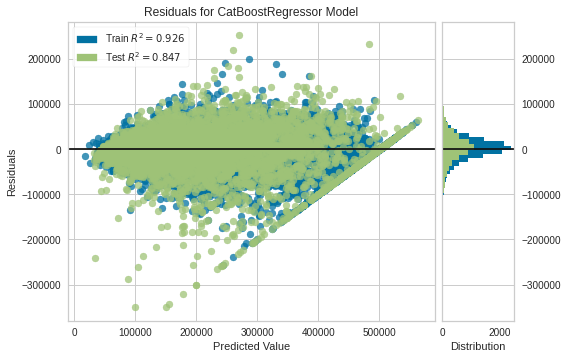

In [10]:
plot_model(tuned_catboost)

## Prediction Error Plot
- We can also visualize the predicted values against the actual target values by creating a prediction error plot.

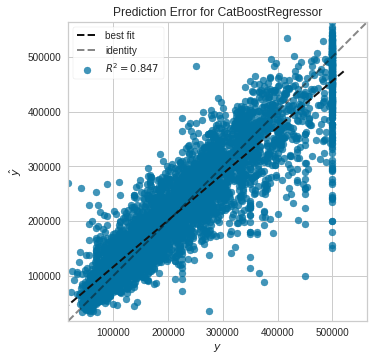

In [11]:
plot_model(tuned_catboost, plot = 'error')

## Feature Importance Plot

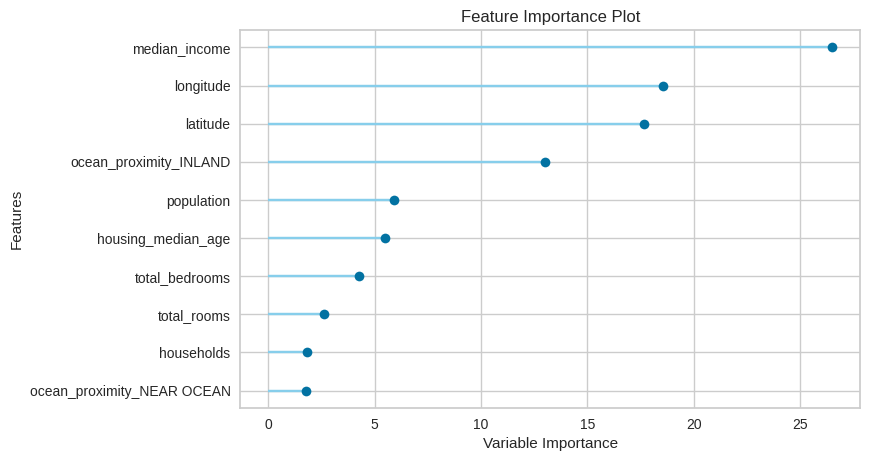

In [12]:
plot_model(tuned_catboost, plot = 'feature')

## Evaluate Model using All Plots

In [14]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpreting the Model
- The interpret_model explains a model's predictions. This function uses a library for explainable machine learning called **SHAP**.
- Based on this plot, we can see that the median_income field has the greatest impact on the predicted house value.

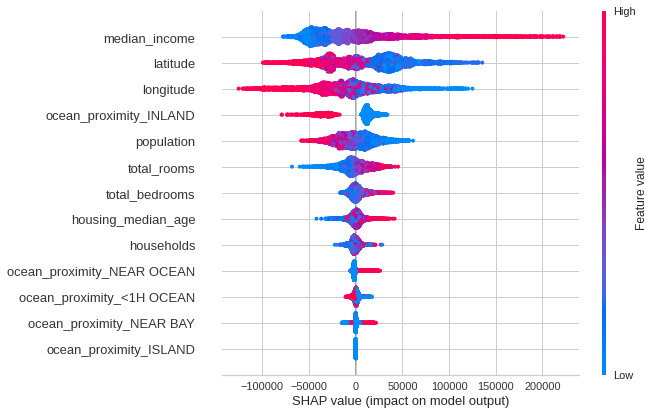

In [15]:
interpret_model(tuned_catboost)

## AutoML
- PyCaret can run automated machine learning (AutoML). We can specify the loss function or metric that we want to optimize and then just let the library take over.
- The AutoML model also happens to be a CatBoost regressor, which we can confirm by printing out the model.

In [16]:
automl_model = automl(optimize = 'MAE')

In [17]:
print(automl_model)

## Generate Predictions
- `predict_model` produces predictions for the holdout datasets used for validating the model during cross-validation. The code also gives us a dataframe with performance statistics for the predictions generated by the AutoML model.

In [18]:
pred_holdouts = predict_model(automl_model)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,29557.2726,1959196967.3202,44262.8170,0.8518,0.2249,0.1678


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,Label
0,-122.639999,38.240002,40.0,1974.0,410.0,1039.0,398.0,3.7917,1.0,0.0,0.0,0.0,0.0,151600.0,204245.853674
1,-119.050003,36.090000,9.0,3297.0,568.0,1749.0,568.0,4.0217,0.0,1.0,0.0,0.0,0.0,99200.0,98050.988356
2,-116.980003,32.849998,12.0,3570.0,713.0,3321.0,666.0,4.0882,1.0,0.0,0.0,0.0,0.0,134500.0,145348.324627
3,-118.419998,34.200001,27.0,3201.0,970.0,3403.0,948.0,2.2377,1.0,0.0,0.0,0.0,0.0,231700.0,177355.589219
4,-118.470001,34.009998,41.0,2704.0,557.0,1047.0,478.0,4.4211,1.0,0.0,0.0,0.0,0.0,462900.0,422591.317506


## Save & Re-Load Model

In [19]:
save_model(automl_model, model_name='automl-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='median_house_value',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='median_house_value')),
                 ('fix_perfect', Remove_100(target='median_house_value')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_se

In [20]:
loaded_model = load_model('automl-model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='median_house_value',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='median_house_value')),
                ('fix_perfect', Remove_100(target='median_house_value')),
                ('clean_names', Clean_Colum_Na

## Deploy to AWS S3
- Now that we have a model pipeline that is ready for production, we can also deploy the model to a cloud platform such as AWS with the deploy_model function. Before running this function, you must run the following command to configure your AWS command-line interface if you plan on deploying the model to an S3 bucket:

In [21]:
#!aws configure

## MLflow UI
- PyCaret can log and track your experiments with `MLflow` from localhost using your browser.

In [25]:
# !mlflow ui -- disabled due to problems with werkzeug package